# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [26]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from numpy.ma.core import minimum

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

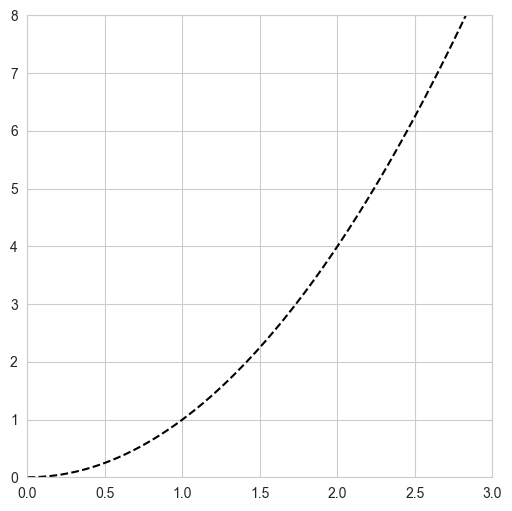

In [27]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

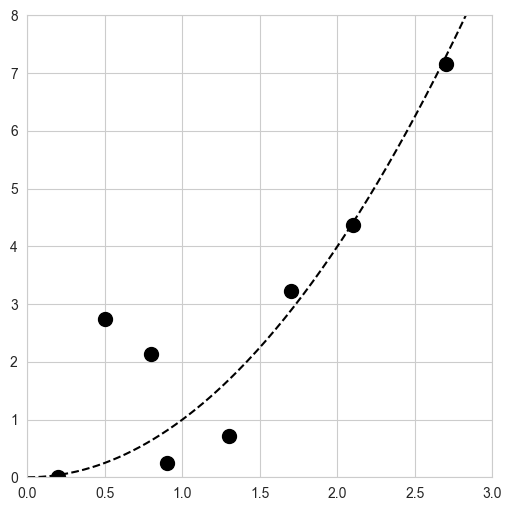

In [28]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [29]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.37951114]
-0.4593635776455063


Definiujemy naszą funkcję regresji

In [30]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

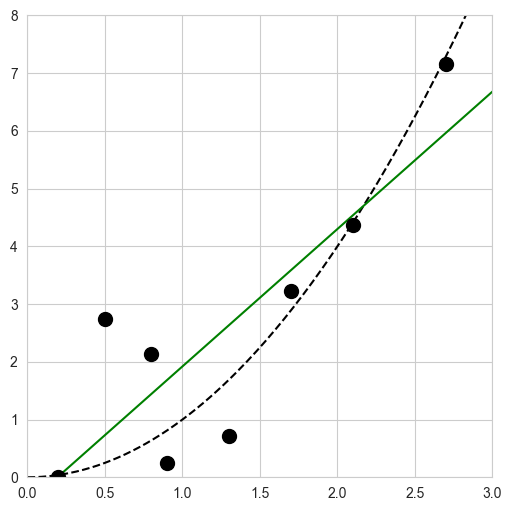

In [31]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [32]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

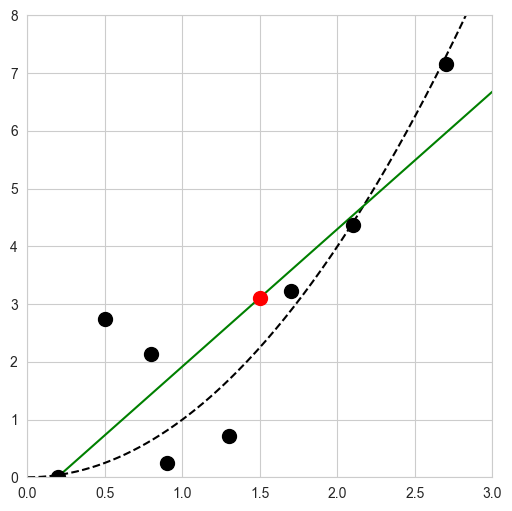

In [33]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [34]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.7061884154449416
0.5839473175583892


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [35]:
deg=1
xx=np.vander(x, deg + 1)
xx
#my solution
solution = np.linalg.solve(xx.T@xx,np.dot(xx.T,y))
print(solution)

#chatgpt solution
# Obliczamy macierze A^T A i A^T y (normalne równania)
ATA = xx.T @ xx
ATy = xx.T @ y

# Rozwiązujemy równanie normalne przy użyciu linalg.solve
beta = np.linalg.solve(ATA, ATy)
print("Współczynniki regresji (beta):", beta)

[ 2.37951114 -0.45936358]
Współczynniki regresji (beta): [ 2.37951114 -0.45936358]


# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [36]:
from scipy import optimize

#my solution
def func(params):
    x, y = params
    return (x+1)**2+y**2
optimal = optimize.fmin_cg(func,[0,0])
print(optimal)
#chatgpt solution
# Definicja funkcji celu
def f(theta):
    x, y = theta
    return (x + 1)**2 + y**2

# Definicja gradientu funkcji
def grad_f(theta):
    x, y = theta
    return np.array([2 * (x + 1), 2 * y])

# Warunek początkowy
initial_guess = np.array([0.0, 0.0])

# Minimalizacja przy użyciu fmin_cg
result = optimize.fmin_cg(f, x0=initial_guess, fprime=grad_f)
print("Minimum znalezione w punkcie:", result)
print("Wartość funkcji w minimum:", f(result))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Minimum znalezione w punkcie: [-1.  0.]
Wartość funkcji w minimum: 0.0


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [42]:

#my solution
def SE(x,y,a,b):
    return np.sum((y-(a*x+b))**2)
#chatgpt solution
def compute_error(a, b, x, y):
    """
    Oblicza błąd kwadratowy (sumę kwadratów reszt) dla danych (x, y) oraz modelu liniowego y = ax + b.
    
    Parameters:
    -----------
    a : float
        Współczynnik kierunkowy.
    b : float
        Wyraz wolny.
    x : array_like
        Dane wejściowe (zmienna niezależna).
    y : array_like
        Dane wyjściowe (zmienna zależna).
        
    Returns:
    --------
    float
        Suma kwadratów różnic między obserwacjami a wartościami przewidywanymi.
    """
    # Obliczenie przewidywanych wartości
    y_pred = a * x + b
    # Obliczenie błędu kwadratowego
    error = np.sum((y - y_pred) ** 2)
    return error

# Przykładowe dane

# Przykładowe parametry modelu
a = 0.8
b = 1.5

print("Błąd kwadratowy:", compute_error(a, b, x, y))

Błąd kwadratowy: 86.24496402882917


# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [43]:
#my solution
loss = lambda params: SE(x,y,params[0],params[1])
initial_guess = np.array([1.0, 0.0])
result = optimize.fmin_cg(loss, x0=initial_guess)
print(result)
print(SE(x,y,result[0],result[1]))
#chatgpt solution
# Funkcja celu dla optymalizacji, przyjmująca wektor parametrów theta = [a, b]
def objective(theta, x, y):
    a, b = theta
    return compute_error(a, b, x, y)


# Minimalizacja funkcji błędu - wybieramy warunek początkowy
initial_guess = np.array([0.0, 0.0])
opt_theta = optimize.fmin(objective, initial_guess, args=(x, y), disp=False)
a_opt, b_opt = opt_theta

print("Optymalne parametry (a, b) znalezione metodą optymalizacji:", opt_theta)
print("Minimalny błąd kwadratowy:", compute_error(a_opt, b_opt, x, y))

# Porównanie z rozwiązaniem metodą najmniejszych kwadratów (równanie normalne)
# Tworzymy macierz A: pierwsza kolumna to x, druga to jedynki.
A = np.column_stack((x, np.ones(len(x))))
# Równanie normalne: (A^T A) beta = A^T y
beta = np.linalg.solve(A.T @ A, A.T @ y)
print("Parametry (a, b) z rozwiązania normalnego:", beta)

# Porównanie wyników
print("\nRóżnica w parametrach:")
print("a: {:.6f} vs {:.6f}".format(opt_theta[0], beta[0]))
print("b: {:.6f} vs {:.6f}".format(opt_theta[1], beta[1]))

Optimization terminated successfully.
         Current function value: 77.161745
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[-0.54378611  3.15487681]
77.16174467257078
Optymalne parametry (a, b) znalezione metodą optymalizacji: [-0.54380328  3.15489219]
Minimalny błąd kwadratowy: 77.16174467442319
Parametry (a, b) z rozwiązania normalnego: [-0.54378578  3.15487618]

Różnica w parametrach:
a: -0.543803 vs -0.543786
b: 3.154892 vs 3.154876


# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [55]:
#my solution
def compute_error_1(a, b, x, y):
    return np.abs(y-(a*x+b)).sum()
#chatgpt solution
def compute_error_1(a, b, x, y):
    """
    Oblicza błąd sumy bezwzględnych różnic dla modelu liniowego y = ax + b.

    Parameters:
    -----------
    a : float
        Współczynnik kierunkowy.
    b : float
        Wyraz wolny.
    x : array_like
        Dane wejściowe.
    y : array_like
        Dane wyjściowe.

    Returns:
    --------
    float
        Suma bezwzględnych różnic między y_i a (a*x_i + b).
    """
    return np.sum(np.abs(y - (a * x + b)))

# Przykładowe parametry modelu
a = 0.8
b = 1.5

print("Błąd absolutny:", compute_error_1(a, b, x, y))

Błąd absolutny: 16.596314433639595


# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [48]:
#my solution
loss = lambda params: compute_error_1(params[0], params[1], x, y)
intial_guess = np.array([1.0, 0.0])
result = optimize.fmin_cg(loss, x0=initial_guess)
print(result)

#chatgpt solution
def objective(theta, x, y):
    """
    Funkcja celu dla optymalizacji, przyjmująca wektor parametrów theta = [a, b].
    """
    a, b = theta
    return compute_error_1(a, b, x, y)


# Warunek początkowy dla optymalizacji
initial_guess = np.array([0.0, 0.0])

# Minimalizacja funkcji błędu absolutnego przy użyciu fmin
opt_theta = optimize.fmin(objective, initial_guess, args=(x, y), disp=False)
a_opt, b_opt = opt_theta

print("Optymalne parametry (a, b) przy minimalizacji błędu absolutnego:", opt_theta)
print("Minimalny błąd absolutny:", compute_error_1(a_opt, b_opt, x, y))

# Porównanie z rozwiązaniem metodą najmniejszych kwadratów (równanie normalne)
A = np.column_stack((x, np.ones(len(x))))
beta = np.linalg.solve(A.T @ A, A.T @ y)
print("Parametry (a, b) z rozwiązania normalnego:", beta)

# Porównanie wyników:
print("\nPorównanie wyników:")
print("a: absolute error = {:.6f}, OLS = {:.6f}".format(a_opt, beta[0]))
print("b: absolute error = {:.6f}, OLS = {:.6f}".format(b_opt, beta[1]))

         Current function value: 11.025406
         Iterations: 8
         Function evaluations: 429
         Gradient evaluations: 139
[0.89111344 0.13403498]
Optymalne parametry (a, b) przy minimalizacji błędu absolutnego: [0.85168301 0.2110506 ]
Minimalny błąd absolutny: 11.00174804785744
Parametry (a, b) z rozwiązania normalnego: [-0.54378578  3.15487618]

Porównanie wyników:
a: absolute error = 0.851683, OLS = -0.543786
b: absolute error = 0.211051, OLS = 3.154876


D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_optimize.py:1659: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


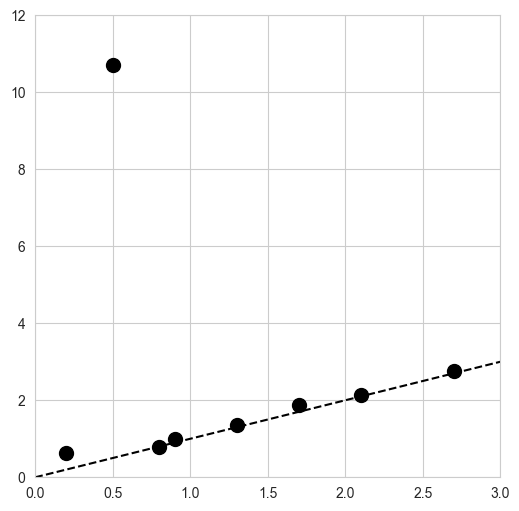

Optimization terminated successfully.
         Current function value: 75.525202
         Iterations: 12
         Function evaluations: 60
         Gradient evaluations: 20
[-0.64164402  3.47294188]
Optimization terminated successfully.
         Current function value: 10.674426
         Iterations: 3
         Function evaluations: 34
         Gradient evaluations: 11
[0.844441   0.39069907]


In [56]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)
plt.show()

#my solution
SE_loss = lambda params: SE(x,y,params[0], params[1])
norm_sum_loss = lambda params: compute_error_1(params[0], params[1], x, y)
intial_guess = np.array([1.0, 0.0])
result = optimize.fmin_cg(SE_loss, x0=initial_guess)
print(result)
result = optimize.fmin_cg(norm_sum_loss, x0=initial_guess)
print(result)


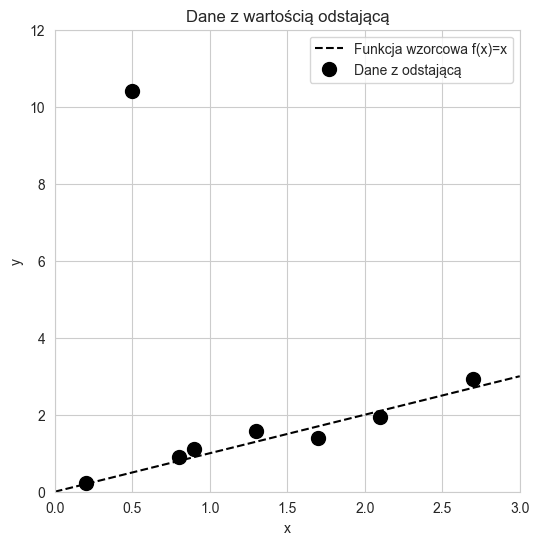

Regresja OLS: a = -0.548, b = 3.259
Regresja L1:  a = 1.063, b = 0.052


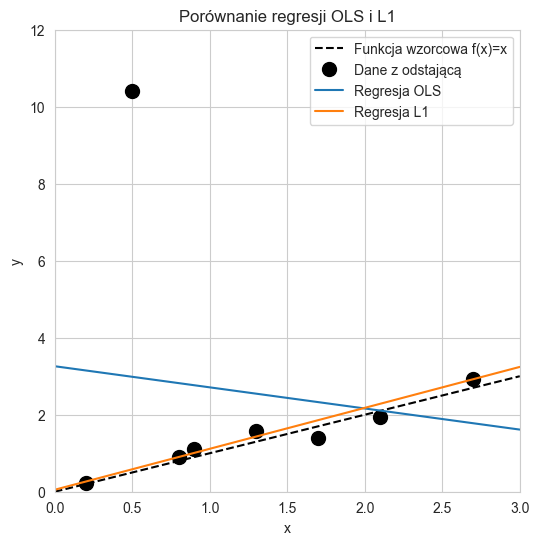

In [58]:
#chatgpt solution
# Funkcja celu do minimalizacji dla regresji L1, przyjmująca wektor parametrów [a, b]
def objective_L1(theta, x, y):
    a, b = theta
    return compute_error_1(a, b, x, y)

# Funkcja wzorcowa: f(x) = x
f = lambda x: x

# Dane do wizualizacji funkcji wzorcowej
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)

# Dane treningowe: kilka punktów z losowym szumem
x = np.array([0.2, 0.5, 0.8, 0.9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x)) / 5
# Wprowadzenie wartości odstającej
y[1] = y[1] + 10

# Wizualizacja danych i funkcji wzorcowej
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 12])
plt.plot(x_tr, y_tr, '--k', label="Funkcja wzorcowa f(x)=x")
plt.plot(x, y, 'ok', ms=10, label="Dane z odstającą")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dane z wartością odstającą")
plt.legend()
plt.show()

# ---------------------------------------------
# Regresja metodą najmniejszych kwadratów (OLS)
# ---------------------------------------------
# Tworzymy macierz projektującą (Vandermonde): kolumna z x i kolumna jedynek
A = np.column_stack((x, np.ones(len(x))))
beta_ols = np.linalg.solve(A.T @ A, A.T @ y)
a_ols, b_ols = beta_ols

# ---------------------------------------------
# Regresja L1 (minimalizacja błędu absolutnego) z compute_error_1
# ---------------------------------------------
initial_guess = np.array([1.0, 1.0])
beta_L1 = optimize.fmin(objective_L1, initial_guess, args=(x, y), disp=False)
a_L1, b_L1 = beta_L1

print("Regresja OLS: a = {:.3f}, b = {:.3f}".format(a_ols, b_ols))
print("Regresja L1:  a = {:.3f}, b = {:.3f}".format(a_L1, b_L1))

# Wizualizacja wyników regresji
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 12])
plt.plot(x_tr, y_tr, '--k', label="Funkcja wzorcowa f(x)=x")
plt.plot(x, y, 'ok', ms=10, label="Dane z odstającą")
plt.plot(x_tr, a_ols * x_tr + b_ols, label="Regresja OLS")
plt.plot(x_tr, a_L1 * x_tr + b_L1, label="Regresja L1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie regresji OLS i L1")
plt.legend()
plt.show()

In [ ]:
points = np.column_stack((x,y))